In [236]:
from __future__ import print_function

import numpy as np
import matplotlib
import cv2
import pprint
import time

import pickle
import neat
import os

import copy
import warnings
import matplotlib.pyplot as plt
import graphviz

from scipy.integrate import odeint
import math

from simple_pid import PID


import GA


In [ ]:
pp = pprint.PrettyPrinter(indent=4)

def newPID(a=0.01,b=0,c=50):
    m = 0.0027 # 2.7 gr
    g = 9.8 # gravity acceleration
    fr = 0.01 # friction
    ts = 0.001 #time step we would like to perform the calculation

    # Initial condition of the system, the surface start at an angle
    # The acceleration and velocity is zero at this moment.
    x0    = [0, 0, 0, 0]
    x0dot = [0, 0, 0, 0]
    alpha = 1*math.pi/180 # u = alpha
    beta  = -1*math.pi/180 # u = alpha

    # The model that delivers the dx/dt matrix as defined above
    # This model is used by odeint
    def model(x, t, alpha, beta):
        xdot = np.zeros(4)

        xdot[0] = x[1]
        xdot[1] = (3/5)*g*np.sin(alpha)
        xdot[2] = x[3]
        xdot[3] = (3/5)*g*np.sin(beta)

        return xdot

    # Some results for plotting
    xp   = []
    yp   = []
    time = []

    Kpx = a;
    Kix = b;
    Kdx = c;
    esumx = 0;
    perrx = 0;

    Kpy = a;
    Kiy = b;
    Kdy = c;
    esumy = 0;
    perry = 0;

    refx = -2;
    refy = 2;

    x = x0
 
    for i in range (0, int(60/ts)):
        errorx = refx - x[0]
        errory = refy - x[2]

        esumx = esumx + errorx
        esumy = esumy + errory

        derrx = errorx - perrx
        derry = errory - perry

        if ( i == 0 ):
            derrx = 0
            derry = 0

        alpha = Kpx * errorx + Kix * esumx + Kdx * derrx
        beta  = Kpy * errory + Kiy * esumx + Kdy * derry

        perrx = errorx
        perry = errory

        y = odeint(model, x, [0, ts], args=(alpha, beta))
        x = y[1]

        if ( i % (0.1/ts) == 0 ):
            xp.append(y[1][0])
            yp.append(y[1][2])
            time.append(i * ts)
            #print(xp[-1],refx,yp[-1],refy)
            #print(np.absolute(xp[-1]-refx))
        if ( i*ts > 10 ):
            refx = 3
            refy = 4
  
        
       # print('mark')
        
       
    oldX = 0
    oldY = 0
    stagnationcount = 0
    diffX = 0
    diffY = 0
    fig, ax = plt.subplots()
    line, = plt.plot(xp, yp, label='x')
    count = 0
    
    for i in xp:
        count += 1
                    
        #Are you on it?
        if(np.absolute(xp[count-1]-refx) > 0.1):
            continue
        #Do you stay on it?
        if(xp[-2] != 0):
                #print('oldX is set')
                diffX = xp[count-1] - xp[count-2]
                if (np.absolute(diffX) < 0.1):
                    #print('oldX diff is small')
                    if(yp[count-2] != 0):
                        #print('oldY is set')
                        diffY = yp[count-1] - yp[count-2]
                        if(np.absolute(diffY)<0.1):
                            #print('oldY diff is small')
                            stagnationcount += 1
                            #print('stagnation detected '+str(diffX)+' - '+str(diffY))
                elif stagnationcount != 0: 
                    #print('lost stagnation with '+str(diffX)+' - '+str(diffY))
                    stagnationcount = 0
        if(stagnationcount > 4):
                #print('stagnation detected from '+str(i-4))
                #fig, ax = plt.subplots()
                #line, = plt.plot(xp, yp, label='x')
                #print(xp[count])
                return count,xp,yp
            #print(len(xp))
       
    print('Never reached it, max',str(len(xp)))
    return (len(xp)),xp,yp

stagnation detected from -0.9429986119996077
3.0537119403017394


362

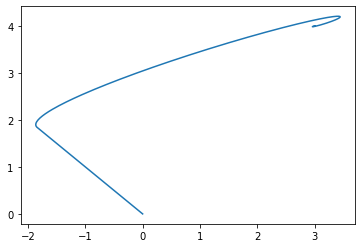

In [240]:
a,b,c = newPID()
a

Never reached it, max 600


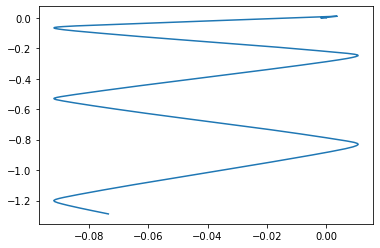

In [235]:
a,b,c = newPID(75.33294282 ,54.76171816, 85.94445181)


stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected 0.0 - 0.0
stagnation detected from -4.209106894278515


(596,
 [-5.879608183066354e-08,
  -0.0005940290373225575,
  -0.002329534198885723,
  -0.005172495658553641,
  -0.00908918002552576,
  -0.014046208708033418,
  -0.0200105669977349,
  -0.026949612679583842,
  -0.034831084175890675,
  -0.043623108233319094,
  -0.05329420716157489,
  -0.06381330563255629,
  -0.0751497370487379,
  -0.08727324948956092,
  -0.10015401124459661,
  -0.11376261594223684,
  -0.12807008728265326,
  -0.14304788338374172,
  -0.15866790074874368,
  -0.17490247786421523,
  -0.1917243984369567,
  -0.20910689427851423,
  -0.2270236478457788,
  -0.2454487944462011,
  -0.2643569241160624,
  -0.2837230831802035,
  -0.3035227755015433,
  -0.3237319634286882,
  -0.34432706844980127,
  -0.36528497156094114,
  -0.3865830133568977,
  -0.4081989938525363,
  -0.4301111720426329,
  -0.4522982652079577,
  -0.4747394479754848,
  -0.4974143511403247,
  -0.5203030602570587,
  -0.5433861140079179,
  -0.5666445023553388,
  -0.5900596644861298,
  -0.6136134865545395,
  -0.637288299231386

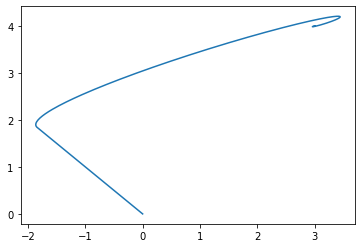

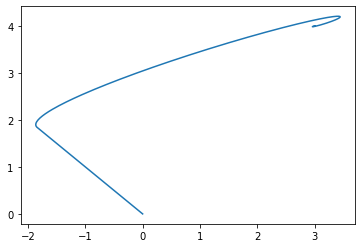

Generation :  0
[35.71436644 95.23942443 76.94685721]
Never reached it, max 600
<class 'int'> 600
A new champion has been found: [35.71436644 95.23942443 76.94685721]
[80.00465131 70.34782804 53.08601228]
Never reached it, max 600
<class 'int'> 600
[84.3216912  61.36389709 30.02994308]
Never reached it, max 600
<class 'int'> 600
[89.92500657 52.74166491 64.93197972]
Never reached it, max 600
<class 'int'> 600
[92.31858146 46.61258988 35.12205373]
Never reached it, max 600
<class 'int'> 600
[26.91980955 96.27295033 70.5470235 ]


KeyboardInterrupt: 

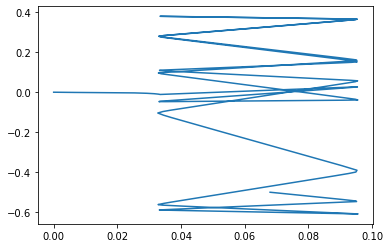

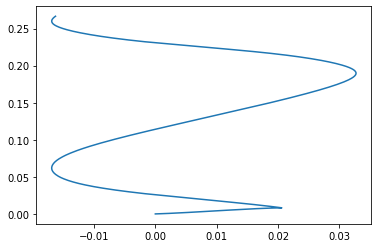

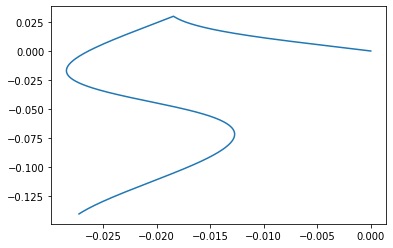

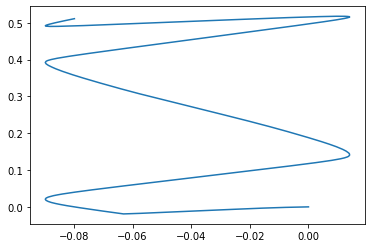

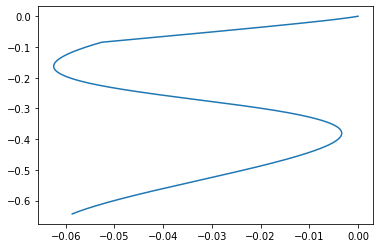

In [295]:

#The y=target is to maximize this equation ASAP:
    #y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    #where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    #What are the best values for the 6 weights w1 to w6?
    #We are going to use the genetic algorithm for the best possible values after a number of generations.


# Inputs of the equation.
#equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = 3


#Genetic algorithm parameters:
#    Mating pool size
#    Population size
#"""
sol_per_pop = 30
num_parents_mating = 8

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = np.random.uniform(low=0.0, high=100.0, size=pop_size)
fitness = []
lowestFitness= 13337
num_generations = 20
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    #fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    chromosomes = np.array(new_population)
    fitnessintern = 600*sol_per_pop
    for chromosome in chromosomes:
        print(chromosome)
        a,b,c = chromosome
        result,xp,yp = newPID(a,b,c)
        #plt.plot(xp, yp, label='x')
        print(type(result), result)
        fitnessintern -= result
        if(result < lowestFitness):
            lowestFitness = result
            print('A new champion has been found: '+str(chromosome))
    fitness.append(fitnessintern)
    print('total fitness of this gen: '+str(fitness[len(fitness)-1]))
    # Selecting the best parents in the population for mating.
    parents = GA.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = GA.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = GA.mutation(offspring_crossover, num_mutations=2)

    # Creating the new population based on the parents and offspring.

    
    if(fitnessintern <= 0):
        new_population = np.random.uniform(low=0.0, high=1.0, size=pop_size)
    else:
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation
    # The best result in the current iteration.
    print("Best result : ", np.max(np.sum(new_population, axis=1)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
chromosomes = np.array(new_population)
fitnessintern = 100*sol_per_pop
for chromosome in chromosomes:
    print(chromosome)
    a,b,c = chromosome
    result,xp,yp = newPID(a,b,c)
    plt.plot(xp, yp, label='x')
    print(type(result), result)
    fitnessintern -= result
fitness.append(fitnessintern)    
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

stagnation detected from -0.910839655229216
3.09616826861109


300

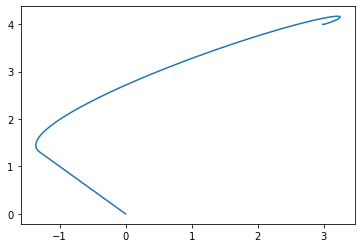

In [294]:
a,b,c = newPID(0.0052,0,40) #most optimal so far
a

stagnation detected from -0.9429986119996077
3.0537119403017394


362

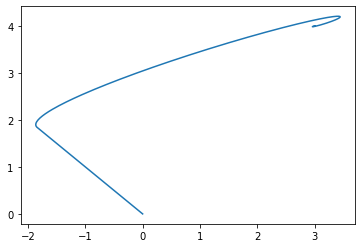

In [276]:
a,b,c = newPID()
a
